<a href="https://colab.research.google.com/github/EduMontiel19/Naive_Bayes/blob/main/Naive_Bayes_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NAIVE VAYES: Predicción de diagnostico de diabetes**

##**DATA SET**
Los datos muestran detalles de 4999 personas con su edad, IMC, glucosa, presion arterial, trigliceridos, antecedentes familiares y precencia de presion alta.

> target: Diabetes_diagnostic (1 = Diabetes, 0 = Sin diabetes)

>feactures: Age, BMI, Glucose, BloodPressure, Triglycerides, FamilyHistory(1 = Sí, 0 = No)., DietType, Hypertension (1 = Sí, 0 = No).

In [ ]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import itertools
pio.renderers.default = 'colab'
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [ ]:
data=pd.read_csv('diabetes_dataset.csv')
print(f'data.shape: {data.shape}')
data.head()

data.shape: (4999, 9)


,Age,BMI,Glucose,BloodPressure,Triglycerides,FamilyHistory,DietType,Hypertension,Diabetes_diagnostic
0,69,28,130,77,50,0,0,0,0
1,32,26,117,72,130,0,0,0,0
2,89,25,101,82,178,0,0,0,0
3,78,30,146,104,117,0,0,0,1
4,38,25,103,74,146,0,1,0,0


## 2. Visualizacion del DataSet

In [ ]:
df=pd.DataFrame(data)
df

,Age,BMI,Glucose,BloodPressure,Triglycerides,FamilyHistory,DietType,Hypertension,Diabetes_diagnostic
0,69,28,130,77,50,0,0,0,0
1,32,26,117,72,130,0,0,0,0
2,89,25,101,82,178,0,0,0,0
3,78,30,146,104,117,0,0,0,1
4,38,25,103,74,146,0,1,0,0
...,...,...,...,...,...,...,...,...,...
4994,29,28,101,69,101,1,0,0,1
4995,77,25,129,93,119,0,0,0,0
4996,43,21,94,63,103,1,0,0,1
4997,58,26,119,84,122,1,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  4999 non-null   int64
 1   BMI                  4999 non-null   int64
 2   Glucose              4999 non-null   int64
 3   BloodPressure        4999 non-null   int64
 4   Triglycerides        4999 non-null   int64
 5   FamilyHistory        4999 non-null   int64
 6   DietType             4999 non-null   int64
 7   Hypertension         4999 non-null   int64
 8   Diabetes_diagnostic  4999 non-null   int64
dtypes: int64(9)
memory usage: 351.6 KB


## 3. Preparación del DataSet

In [ ]:
df.isnull().sum().to_frame('NaN Value').T

,Age,BMI,Glucose,BloodPressure,Triglycerides,FamilyHistory,DietType,Hypertension,Diabetes_diagnostic
NaN Value,0,0,0,0,0,0,0,0,0


In [ ]:
for col in df:
  print(f"{col}: {df[col].nunique()}")

Age: 72
BMI: 34
Glucose: 129
BloodPressure: 75
Triglycerides: 239
FamilyHistory: 2
DietType: 3
Hypertension: 2
Diabetes_diagnostic: 2


In [ ]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Age,4999.0,53.301660,20.648059,18.0,36.0,53.0,71.0,89.0
BMI,4999.0,27.018004,5.945672,15.0,23.0,27.0,31.0,48.0
Glucose,4999.0,106.144629,21.878299,50.0,91.0,106.0,121.0,194.0
BloodPressure,4999.0,84.440288,13.909543,60.0,74.0,84.0,94.0,138.0
Triglycerides,4999.0,151.646729,48.895214,50.0,118.0,152.0,186.0,305.0
FamilyHistory,4999.0,0.301060,0.458765,0.0,0.0,0.0,1.0,1.0
DietType,4999.0,0.499900,0.667928,0.0,0.0,0.0,1.0,2.0
Hypertension,4999.0,0.001200,0.034627,0.0,0.0,0.0,0.0,1.0
Diabetes_diagnostic,4999.0,0.318064,0.465771,0.0,0.0,0.0,1.0,1.0


De acuerdo a las tablas:
- El rango de edad esta entre los 18 y 89 años


## 4. Analisis exploratorio de datos

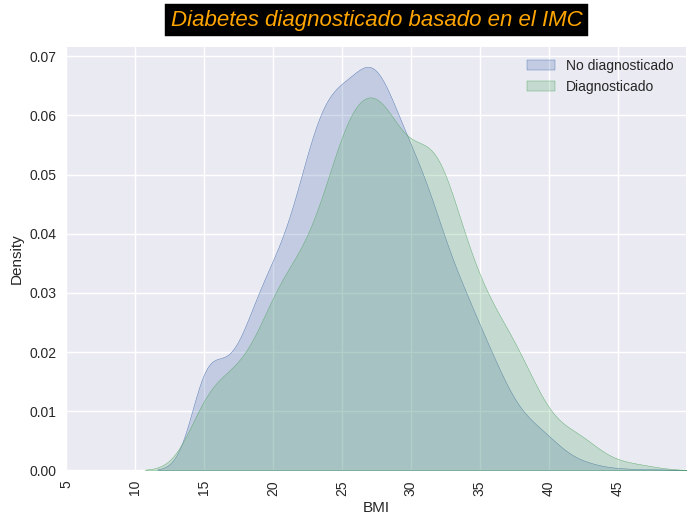

In [ ]:
#Revisar el IMC (basado en diagnostico)
import warnings
warnings.filterwarnings('ignore')
font={'fontsize':16, 'fontstyle':'italic', 'backgroundcolor': 'black', 'color':'orange'}
%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.kdeplot(df.loc[df['Diabetes_diagnostic']==0, 'BMI'], label='No diagnosticado', shade=True)
sns.kdeplot(df.loc[df['Diabetes_diagnostic']==1, 'BMI'], label='Diagnosticado', shade=True)
plt.title('Diabetes diagnosticado basado en el IMC', fontdict=font, pad=15)
plt.xticks(np.arange(5,50,5), rotation=90)
plt.xlim([5,50])
plt.legend()
plt.show()

El **KDE plot (Kernel Density Estimate plot)** es un gráfico que muestra la densidad de una variable continua. Se usa para visualizar la distribusión de los datos de una forma más suave que un histograma, ya que en lugar de agrupar los datos en bins. KDE emplea una funcion de suavizado (Kernel) para generar una curva continua.

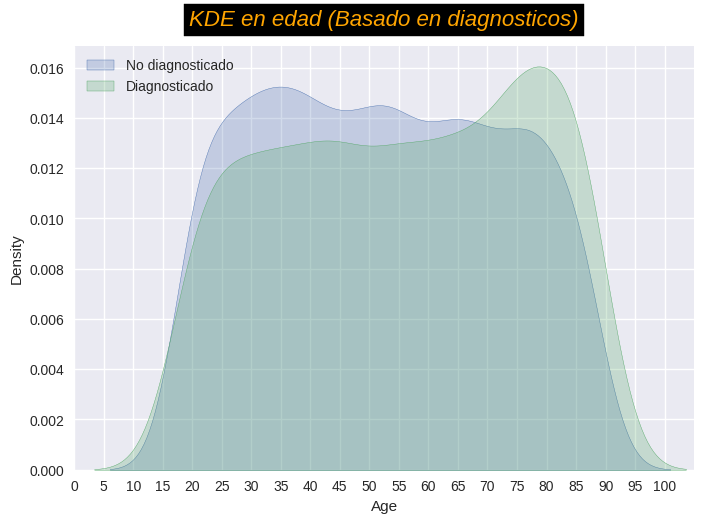

In [ ]:
%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.kdeplot(df.loc[df['Diabetes_diagnostic']==0, 'Age'], label='No diagnosticado', shade=True)
sns.kdeplot(df.loc[df['Diabetes_diagnostic']==1, 'Age'], label='Diagnosticado', shade=True)
plt.title('KDE en edad (Basado en diagnosticos)', fontdict=font, pad=15)
plt.xticks(np.arange(0,105,5))
plt.xlim([0,105])
plt.legend()
plt.show()

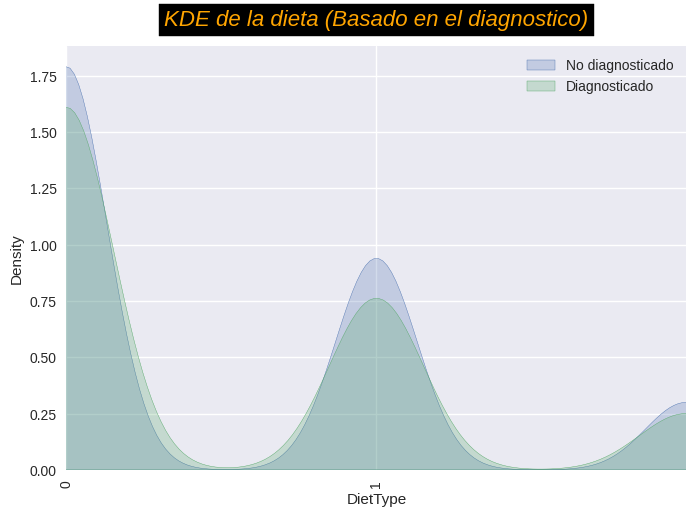

In [ ]:
##Revisar la dieta (basado en diagnostico)
%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.kdeplot(df.loc[df['Diabetes_diagnostic']==0, 'DietType'], label='No diagnosticado', shade=True)
sns.kdeplot(df.loc[df['Diabetes_diagnostic']==1, 'DietType'], label='Diagnosticado', shade=True)
plt.title('KDE de la dieta (Basado en el diagnostico)', fontdict=font, pad=15)
plt.xticks(np.arange(0,2,1), rotation=90)
plt.xlim([0,2])
plt.legend()
plt.show()


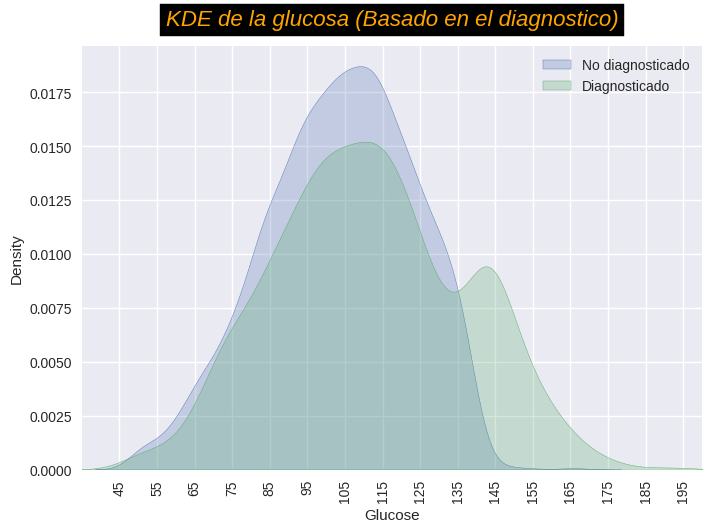

In [ ]:
##Revisar la glucosa (basado en diagnostico)
%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.kdeplot(df.loc[df['Diabetes_diagnostic']==0, 'Glucose'], label='No diagnosticado', shade=True)
sns.kdeplot(df.loc[df['Diabetes_diagnostic']==1, 'Glucose'], label='Diagnosticado', shade=True)
plt.title('KDE de la glucosa (Basado en el diagnostico)', fontdict=font, pad=15)
plt.xticks(np.arange(45,200,10), rotation=90)
plt.xlim([35,200])
plt.legend()
plt.show()

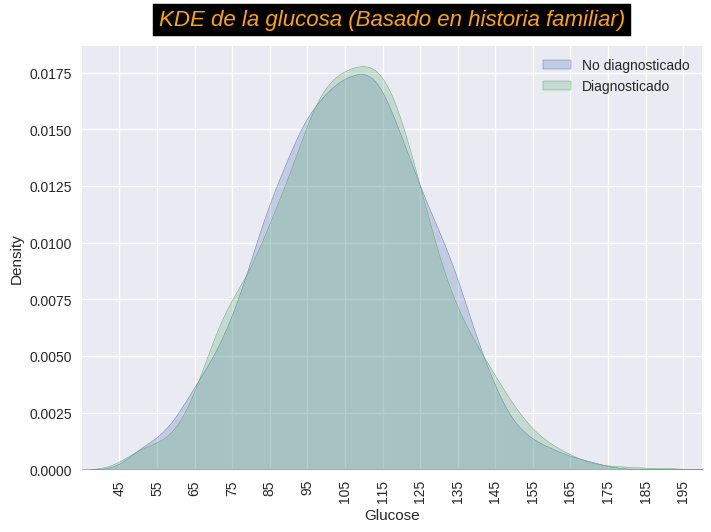

In [ ]:
##Revisar la glucosa (basado en historia familiar)
%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.kdeplot(df.loc[df['FamilyHistory']==0, 'Glucose'], label='No diagnosticado', shade=True)
sns.kdeplot(df.loc[df['FamilyHistory']==1, 'Glucose'], label='Diagnosticado', shade=True)
plt.title('KDE de la glucosa (Basado en historia familiar)', fontdict=font, pad=15)
plt.xticks(np.arange(45,200,10), rotation=90)
plt.xlim([35,200])
plt.legend()
plt.show()

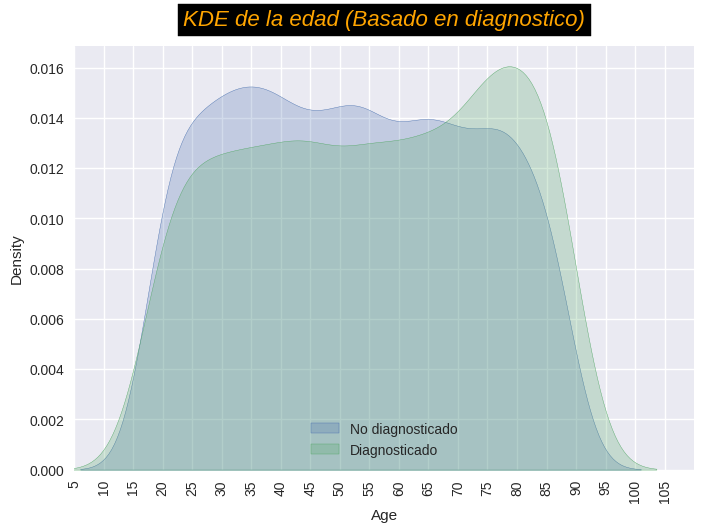

In [ ]:
##Revisar la edad (basado en diagnostico)
%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.kdeplot(df.loc[df['Diabetes_diagnostic']==0, 'Age'], label='No diagnosticado', shade=True)
sns.kdeplot(df.loc[df['Diabetes_diagnostic']==1, 'Age'], label='Diagnosticado', shade=True)
plt.title('KDE de la edad (Basado en diagnostico)', fontdict=font, pad=15)
plt.xticks(np.arange(0,110,5), rotation=90)
plt.xlim([5,110])
plt.legend()
plt.show()

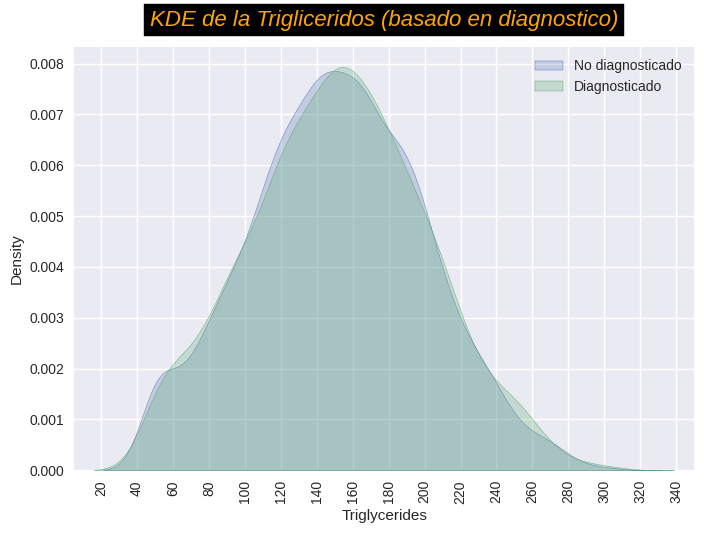

In [ ]:
##Revisar la edad (basado en diagnostico)
%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.kdeplot(df.loc[df['Diabetes_diagnostic']==0, 'Triglycerides'], label='No diagnosticado', shade=True)
sns.kdeplot(df.loc[df['Diabetes_diagnostic']==1, 'Triglycerides'], label='Diagnosticado', shade=True)
plt.title('KDE de la Trigliceridos (basado en diagnostico)', fontdict=font, pad=15)
plt.xticks(np.arange(0,350,20), rotation=90)
plt.xlim([5,350])
plt.legend()
plt.show()

De acuerdo con los KDE anteriores:

## 4.1 Analisis univariable

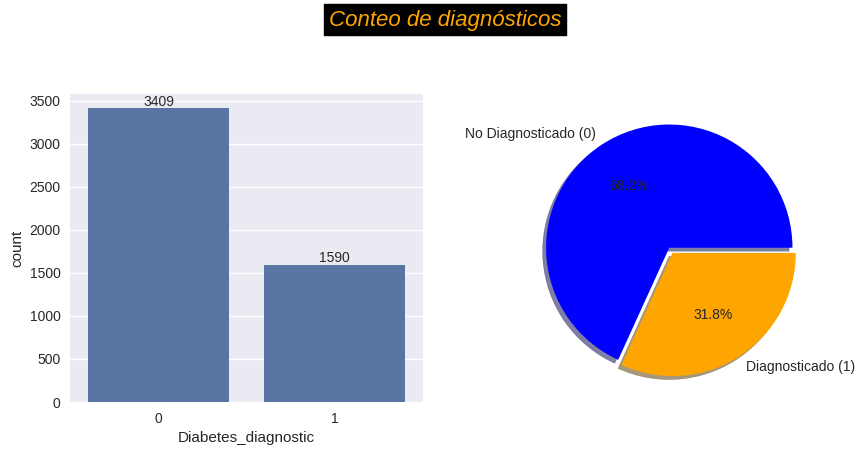

In [ ]:
%matplotlib inline
fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.countplot(data=df, x='Diabetes_diagnostic', ax=axes[0])
for container in axes[0].containers:
  axes[0].bar_label(container)
slices = df.Diabetes_diagnostic.value_counts().values
activities = ['No Diagnosticado (0)', 'Diagnosticado (1)']
axes[1].pie(slices, labels=activities, colors=['blue', 'orange'], shadow=True, explode=[0,0.05], autopct='%1.1f%%')
plt.suptitle('Conteo de diagnósticos', y=1.09, **font)
plt.show()

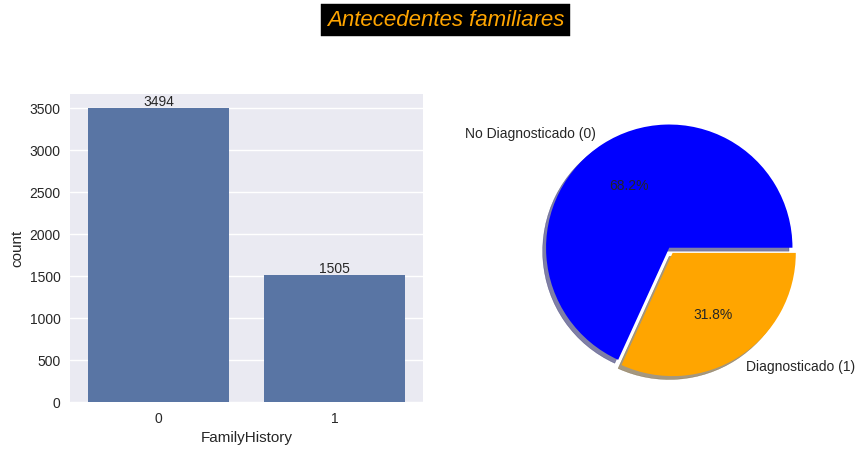

In [ ]:
%matplotlib inline
fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.countplot(data=df, x='FamilyHistory', ax=axes[0])
for container in axes[0].containers:
  axes[0].bar_label(container)
slices = df.Diabetes_diagnostic.value_counts().values
activities = ['No Diagnosticado (0)', 'Diagnosticado (1)']
axes[1].pie(slices, labels=activities, colors=['blue', 'orange'], shadow=True, explode=[0,0.05], autopct='%1.1f%%')
plt.suptitle('Antecedentes familiares', y=1.09, **font)
plt.show()

## 4.2 Analisis bivariable

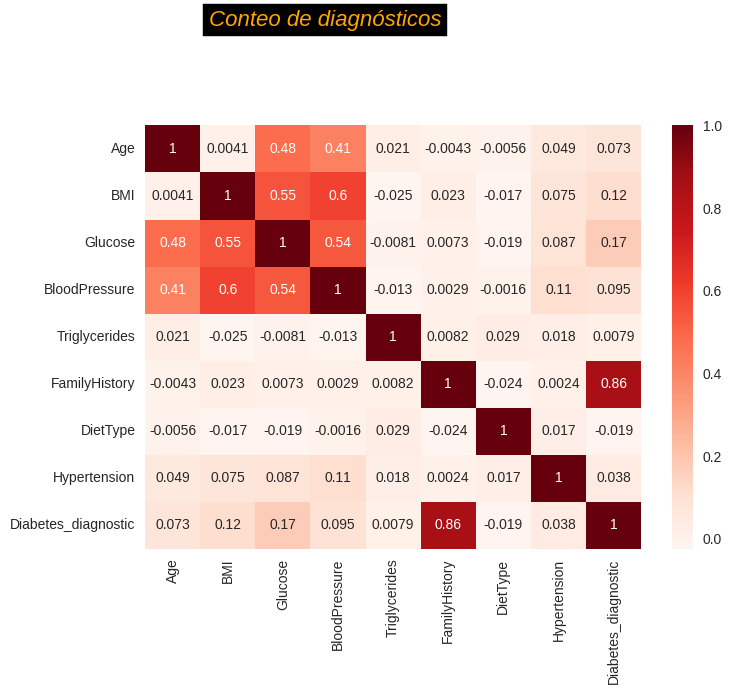

In [ ]:
%matplotlib inline
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.suptitle('Conteo de diagnósticos', y=1.09, x=0.35, **font)
plt.show()

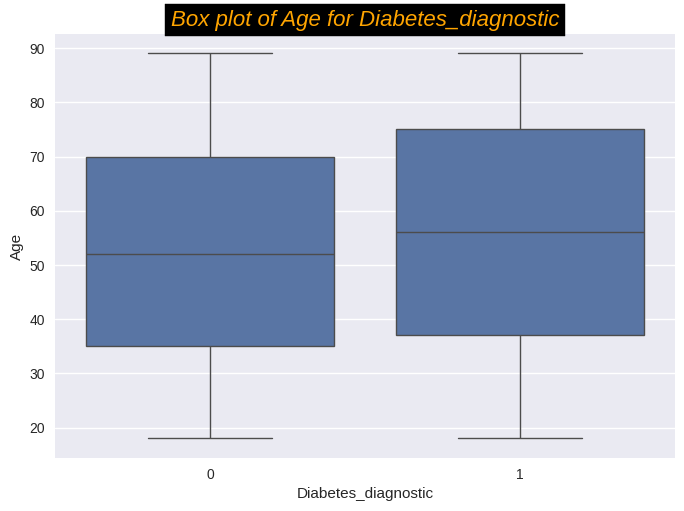

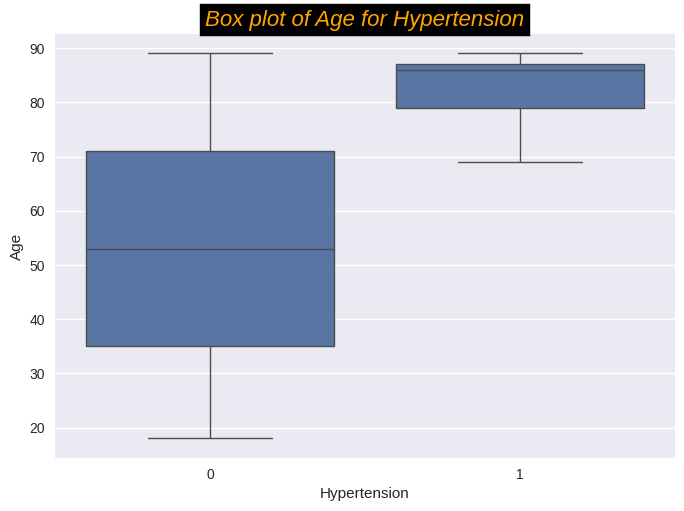

In [ ]:
for col in ['Diabetes_diagnostic', 'Hypertension']: # Changed 'PCOS_diagnosis' to 'PCOS_Diagnosis'
    sns.boxplot(data=df, x=col, y='Age')
    plt.title(f'Box plot of Age for {col}', fontdict=font)
    plt.show()

## 4.3 Analisis Multivariable

In [ ]:
import plotly.express as px
import plotly.io as pio

# Configura el renderizador predeterminado de Plotly para Colab
pio.renderers.default = 'colab'

# Crea la figura 3D
fig = px.scatter_3d(
    data_frame=df,
    x='Glucose',
    y='Triglycerides',
    z='FamilyHistory',
    color='Diabetes_diagnostic',
    template='ggplot2',
    opacity=0.6,
    height=700,
    title='3d scatter basado en Nivel de glucosa, trigliceridos Y antecedentes familiares y diagnosticos'
)

# Muestra la figura
fig.show()

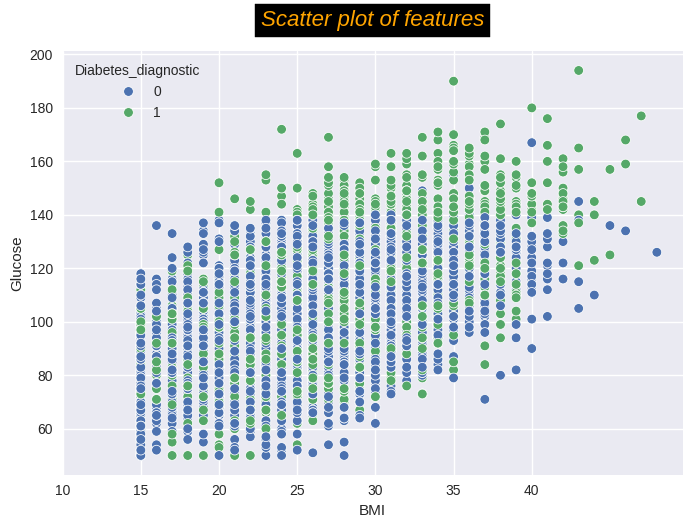

In [ ]:
%matplotlib inline
# check feature correlation
sns.scatterplot(data=df,x='BMI', y='Glucose', hue='Diabetes_diagnostic',)
plt.title('Scatter plot of features', y=1.04, fontdict=font)
plt.xticks(np.arange(10,45,5))
plt.show()

In [ ]:
results=pd.pivot_table(data=df, index='Diabetes_diagnostic', columns='FamilyHistory', values='Glucose')
results.style.background_gradient(cmap='summer_r')

FamilyHistory,0,1
Diabetes_diagnostic,,
0,103.438277,106.669643
1,149.588832,106.363963


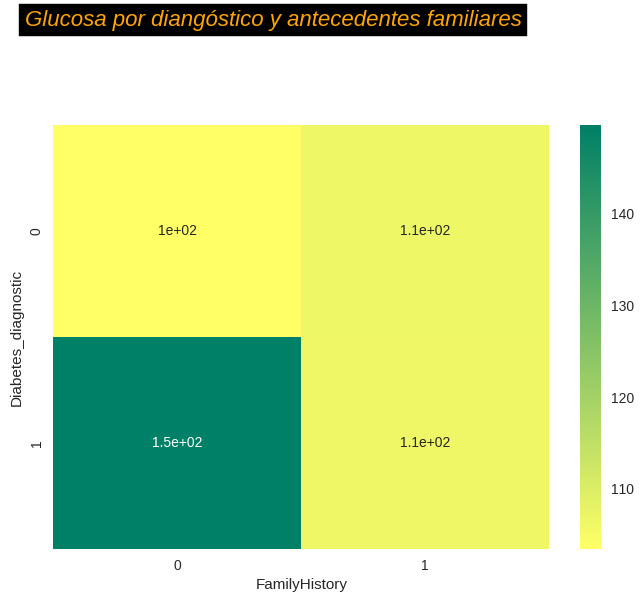

In [ ]:
sns.heatmap(results, cmap='summer_r', annot=True)
plt.suptitle('Glucosa por diangóstico y antecedentes familiares', y=1.09, x=0.4, **font)
plt.show()

In [ ]:
results=pd.pivot_table(data=df, index='Diabetes_diagnostic', columns='FamilyHistory', values='Age')
results.style.background_gradient(cmap='summer_r')

FamilyHistory,0,1
Diabetes_diagnostic,,
0,52.223233,53.633929
1,72.375635,53.129935


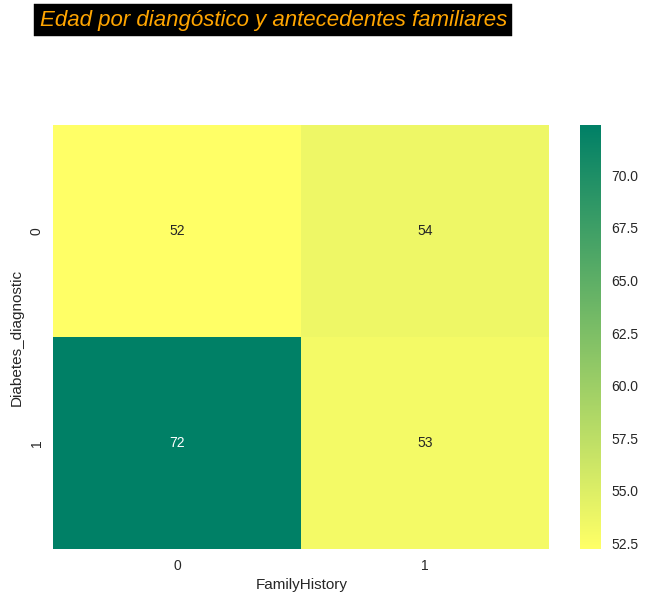

In [ ]:
sns.heatmap(results, cmap='summer_r', annot=True)
plt.suptitle('Edad por diangóstico y antecedentes familiares', y=1.09, x=0.4, **font)
plt.show()

In [ ]:
results=pd.pivot_table(data=df, index='Diabetes_diagnostic', columns='FamilyHistory', values='BMI')
results.style.background_gradient(cmap='summer_r')

FamilyHistory,0,1
Diabetes_diagnostic,,
0,26.523506,27.357143
1,33.736041,27.211055


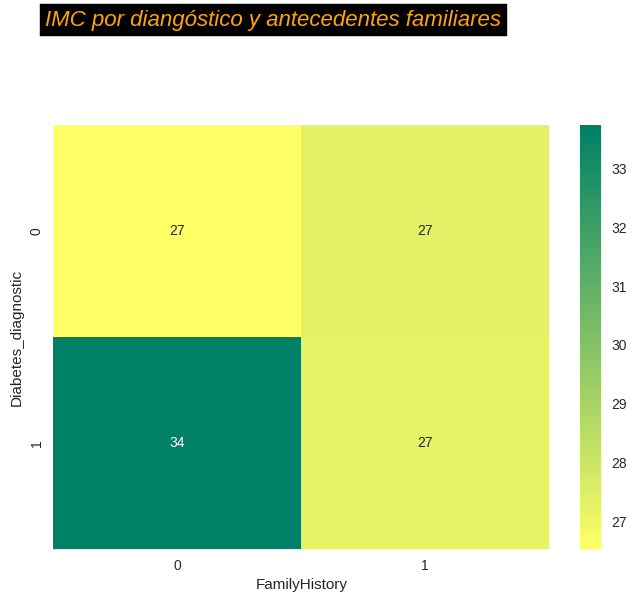

In [ ]:
sns.heatmap(results, cmap='summer_r', annot=True)
plt.suptitle('IMC por diangóstico y antecedentes familiares', y=1.09, x=0.4, **font)
plt.show()

In [ ]:
results=pd.pivot_table(data=df, index='Diabetes_diagnostic', columns='FamilyHistory', values='BloodPressure')
results.style.background_gradient(cmap='summer_r')

FamilyHistory,0,1
Diabetes_diagnostic,,
0,83.515317,84.294643
1,99.451777,84.518306


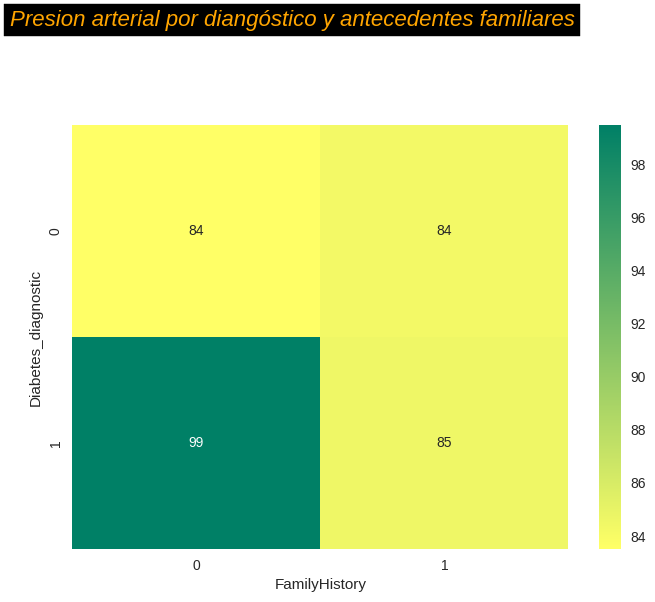

In [ ]:
sns.heatmap(results, cmap='summer_r', annot=True)
plt.suptitle('Presion arterial por diangóstico y antecedentes familiares', y=1.09, x=0.4, **font)
plt.show()

In [ ]:
results=pd.pivot_table(data=df, index='Diabetes_diagnostic', columns='FamilyHistory', values='Triglycerides')
results.style.background_gradient(cmap='summer_r')

FamilyHistory,0,1
Diabetes_diagnostic,,
0,151.555657,146.330357
1,148.522843,152.731515


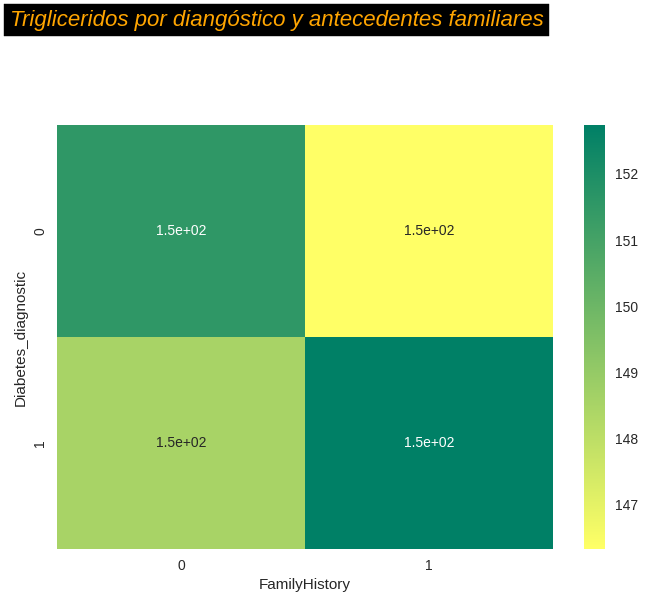

In [ ]:
sns.heatmap(results, cmap='summer_r', annot=True)
plt.suptitle('Trigliceridos por diangóstico y antecedentes familiares', y=1.09, x=0.4, **font)
plt.show()

##Visualizacion de datos

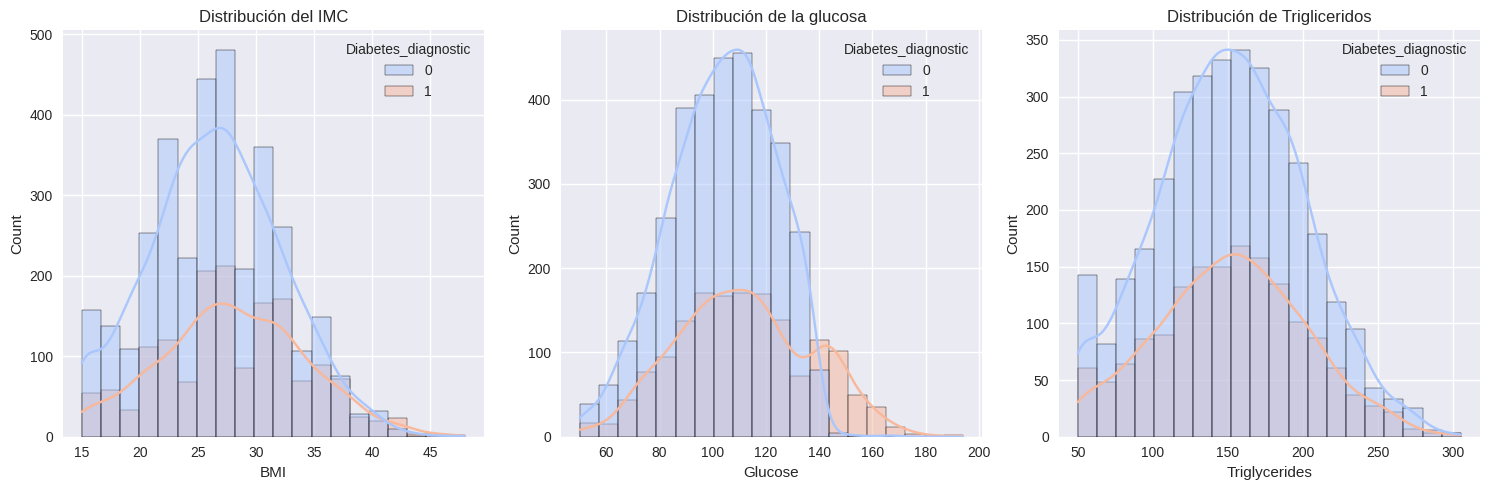

In [ ]:
#Graficamos .a distribucion de cada característica
plt.figure(figsize=(15, 5))

#Histograma de BMI
plt.subplot(1, 3, 1)
sns.histplot(df, x="BMI", hue="Diabetes_diagnostic", kde=True, bins=20, palette="coolwarm")
plt.title("Distribución del IMC")

#Histograma de testosterona
plt.subplot(1, 3, 2)
sns.histplot(df, x="Glucose", hue="Diabetes_diagnostic", kde=True, bins=20, palette="coolwarm")
plt.title("Distribución de la glucosa")

#Histograma de edad
plt.subplot(1, 3, 3)
sns.histplot(df, x="Triglycerides", hue="Diabetes_diagnostic", kde=True, bins=20, palette="coolwarm")
plt.title("Distribución de Trigliceridos")

plt.tight_layout()
plt.show()

##División en conjunto entrenamiento y prueba

In [ ]:
#Definimos características y etiquetas
X = df[['Age', 'BMI', 'Glucose','BloodPressure', 'Triglycerides', 'FamilyHistory', 'DietType', 'Hypertension']]
y = df['Diabetes_diagnostic']

#Dividimos los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.16, random_state = 42)

##Entrenamiento del modelo de Naive Bayes


In [ ]:
#Creamos el modelo
modelo = GaussianNB()

#Entrenamos el modelo con los datos
modelo.fit(X_train, y_train)

GaussianNB()

In [ ]:
#Realizamos predicciones en el conjunto de pruebas
y_pred = modelo.predict(X_test)

#Calculamos la exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {accuracy}')

#Matriz de confuion
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de confusion: \n', conf_matrix)

#Reporte de clasificacion
print('Reporte de clasificacion: \n', classification_report(y_test, y_pred))

Exactitud del modelo: 0.9425
Matriz de confusion: 
 [[527  14]
 [ 32 227]]
Reporte de clasificacion: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       541
           1       0.94      0.88      0.91       259

    accuracy                           0.94       800
   macro avg       0.94      0.93      0.93       800
weighted avg       0.94      0.94      0.94       800



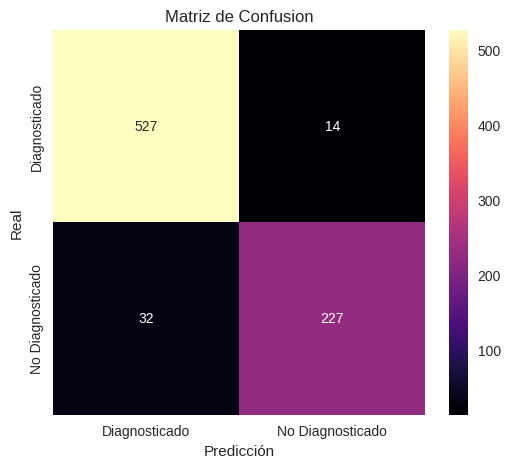

In [ ]:
#Graficamos la matriz de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma', xticklabels=['Diagnosticado', 'No Diagnosticado'], yticklabels=['Diagnosticado', 'No Diagnosticado'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusion')
plt.show()

##Analisis de resultados

El modelo de predicción de diabetes alcanzó una precisión del 94,25 %, lo que indica un alto nivel de desempeño en la clasificación de los casos. La matriz de confusión muestra que el modelo identificó correctamente 527 casos negativos y 227 casos positivos, con solo 14 falsos positivos y 32 falsos negativos.


Estos resultados sugieren que el modelo tiene un rendimiento sólido en la clasificación de pacientes con y sin diabetes, aunque presenta una ligera disminución en el recuerdo para la clase positiva (clase 1), lo que implica que algunos casos de diabetes no fueron identificados correctamente. Sin embargo, la precisión general del modelo es alta, lo que lo convierte en una herramienta confiable para apoyar el diagnóstico de la enfermedad.: